# The Laplace Problem

In [1]:
%reset -f

In [3]:
import os
os.environ['XLA_PYTHON_CLIENT_PREALLOCATE'] = "false"

import numpy as np
import jax
import jax.numpy as jnp
jax.config.update('jax_platform_name', 'cpu')           ## CPU is faster here !

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='notebook', style='ticks',
        font='sans-serif', font_scale=1, color_codes=True, rc={"lines.linewidth": 2})

from updec.cloud import CloudFromGmsh
from updec.operators import *
from updec.utils import print_line_by_line, polyharmonic, multiquadric

## Using Updec

In [4]:
x = CloudFromGmsh("./meshes/disk.msh")

IndexError: index 125 is out of bounds for axis 0 with size 125

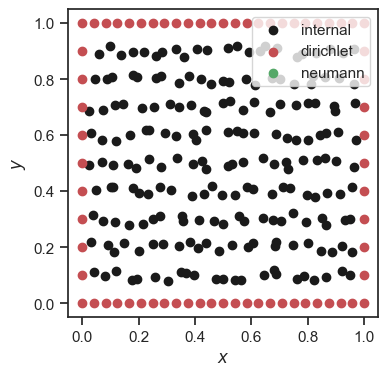

In [ ]:
RBF = polyharmonic      ## Can define which rbf to use
MAX_DEGREE = 4

facet_types={0:"d", 1:"d", 2:"d", 3:"d"}
cloud = Cloud(Nx=25, Ny=11, facet_types=facet_types, noise_seed=35, support_size=1*11-1)
cloud.visualize_cloud(figsize=(4,4));